In [34]:
import pandas as pd 
import numpy as np 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("api_call_frequency.csv")

In [20]:
ds.sample(10)

,Unnamed: 0,Sample Name,category,label,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,NtOpenSection,NtMapViewOfSection,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtClose,NtOpenKey,NtQueryValueKey,GetSystemWindowsDirectoryW,NtCreateFile,NtCreateSection,RegOpenKeyExA,CreateActCtxW,GetSystemDirectoryW,GetVolumeNameForVolumeMountPointW,NtDuplicateObject,LoadStringW,NtCreateMutant,GetNativeSystemInfo,RegEnumKeyW,NtQuerySystemInformation,RegQueryValueExA,NtQueryDirectoryFile,GlobalMemoryStatusEx,CoCreateInstance,NtAllocateVirtualMemory,CreateDirectoryW,DeleteFileW,GetFileSizeEx,NtReadFile,GetFileInformationByHandleEx,GetSystemTimeAsFileTime,GetVolumePathNamesForVolumeNameW,LdrUnloadDll,CoInitializeEx,NtOpenProcess,CoUninitialize,NtFreeVirtualMemory,NtOpenFile,NtQueryInformationFile,GetFileAttributesW,FindFirstFileExW,NtQueryAttributesFile,NtUnmapViewOfSection,SetFilePointerEx,SetFilePointer,GetTempPathW,GetFileSize,NtWriteFile,FindResourceExW,LoadResource,SHGetFolderPathW,NtProtectVirtualMemory,GetFileType,ReadProcessMemory,GetForegroundWindow,GetSystemMetrics,SetFileTime,NtSetInformationFile,SearchPathW,NtOpenMutant,RegEnumKeyExW,DrawTextExW,GetAsyncKeyState,GetDiskFreeSpaceExW,GetKeyState,FindWindowW,FindWindowExA,CreateThread,MoveFileWithProgressW,SetFileAttributesW,RemoveDirectoryW,NtTerminateProcess,CreateToolhelp32Snapshot,Process32FirstW,Process32NextW,FindWindowExW,SetEndOfFile,GetCursorPos,SetUnhandledExceptionFilter,OutputDebugStringA,GetSystemInfo,FindResourceW,SizeofResource,NtDelayExecution,GetKeyboardState,WSAStartup,socket,setsockopt,NtDeviceIoControlFile,closesocket,GetBestInterfaceEx,GetAdaptersAddresses,NtQueryKey,RegCreateKeyExW,GetAddrInfoW,GetUserNameExW,RegSetValueExW,RegDeleteValueW,InternetQueryOptionA,URLDownloadToFileW,IsDebuggerPresent,CreateProcessInternalW,GetTimeZoneInformation,LookupAccountSidW,SendNotifyMessageW,UuidCreate,GetFileVersionInfoSizeW,GetFileVersionInfoW,NtEnumerateValueKey,EnumWindows,OpenSCManagerW,GetComputerNameW,GetUserNameW,NetShareEnum,GetFileInformationByHandle,DeviceIoControl,ShellExecuteExW,RegQueryInfoKeyW,RegEnumValueW,RegDeleteKeyW,NtReadVirtualMemory,NtOpenKeyEx,NtSetValueKey,NtCreateKey,GetVolumePathNameW,GetFileAttributesExW,GetUserNameExA,RegCreateKeyExA,CryptAcquireContextW,NtEnumerateKey,NtDeleteKey,OpenServiceW,NtOpenDirectoryObject,CreateJobObjectW,SetInformationJobObject,RegEnumKeyExA,__exception__,GetShortPathNameW,LoadStringA,FindResourceA,DrawTextExA,RegQueryInfoKeyA,RegSetValueExA,SHGetSpecialFolderLocation,NtCreateThreadEx,NtResumeThread,gethostbyname,GetSystemDirectoryA,FindResourceExA,GetDiskFreeSpaceW,CertOpenStore,CryptDecodeObjectEx,CertControlStore,CryptHashData,NtOpenThread,MessageBoxTimeoutW,LookupPrivilegeValueW,CryptAcquireContextA,SetFileInformationByHandle,RemoveDirectoryA,SetWindowsHookExW,CopyFileW,GetFileVersionInfoSizeExW,GetFileVersionInfoExW,CoInitializeSecurity,WSASocketW,WSAConnect,UnhookWindowsHookEx,CertOpenSystemStoreW,getaddrinfo,InternetCrackUrlW,CoCreateInstanceEx,CoGetClassObject,IWbemServices_ExecQuery,SetStdHandle,GlobalMemoryStatus,NetGetJoinInformation,CryptCreateHash,GetComputerNameA,InternetOpenA,InternetOpenUrlA,InternetCloseHandle,ReadCabinetState,InternetOpenW,InternetConnectW,HttpOpenRequestW,HttpSendRequestW,NtDeleteValueKey,HttpQueryInfoA,RegEnumValueA,CryptProtectMemory,CreateServiceW,WriteConsoleA,CopyFileA,WriteProcessMemory,SendNotifyMessageA,RegDeleteKeyA,WriteConsoleW,JsGlobalObjectDefaultEvalHelper,ObtainUserAgentString,StartServiceW,NtQueueApcThread,RtlAddVectoredContinueHandler,CryptExportKey,CryptGenKey,CryptEncrypt,NetUserGetInfo,GetUserNameA,InternetOpenUrlW,system,GetAdaptersInfo,Module32FirstW,NtGetContextThread,Module32NextW,RtlAddVectoredExceptionHandler,NtSuspendThread,OpenSCManagerA,OpenServiceA,NtQueryMultipleValueKey,MessageBoxTimeoutA,ControlService,NtTerminateThread,EncryptMessage,DecryptMessage,DeleteService,FindWindowA,RtlRemoveVectoredExceptionHandler,ioctlsocket,connect

In [5]:
ds.shape

(3083, 285)

In [6]:
ds.describe()

,Unnamed: 0,label,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,NtOpenSection,NtMapViewOfSection,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtClose,NtOpenKey,NtQueryValueKey,GetSystemWindowsDirectoryW,NtCreateFile,NtCreateSection,RegOpenKeyExA,CreateActCtxW,GetSystemDirectoryW,GetVolumeNameForVolumeMountPointW,NtDuplicateObject,LoadStringW,NtCreateMutant,GetNativeSystemInfo,RegEnumKeyW,NtQuerySystemInformation,RegQueryValueExA,NtQueryDirectoryFile,GlobalMemoryStatusEx,CoCreateInstance,NtAllocateVirtualMemory,CreateDirectoryW,DeleteFileW,GetFileSizeEx,NtReadFile,GetFileInformationByHandleEx,GetSystemTimeAsFileTime,GetVolumePathNamesForVolumeNameW,LdrUnloadDll,CoInitializeEx,NtOpenProcess,CoUninitialize,NtFreeVirtualMemory,NtOpenFile,NtQueryInformationFile,GetFileAttributesW,FindFirstFileExW,NtQueryAttributesFile,NtUnmapViewOfSection,SetFilePointerEx,SetFilePointer,GetTempPathW,GetFileSize,NtWriteFile,FindResourceExW,LoadResource,SHGetFolderPathW,NtProtectVirtualMemory,GetFileType,ReadProcessMemory,GetForegroundWindow,GetSystemMetrics,SetFileTime,NtSetInformationFile,SearchPathW,NtOpenMutant,RegEnumKeyExW,DrawTextExW,GetAsyncKeyState,GetDiskFreeSpaceExW,GetKeyState,FindWindowW,FindWindowExA,CreateThread,MoveFileWithProgressW,SetFileAttributesW,RemoveDirectoryW,NtTerminateProcess,CreateToolhelp32Snapshot,Process32FirstW,Process32NextW,FindWindowExW,SetEndOfFile,GetCursorPos,SetUnhandledExceptionFilter,OutputDebugStringA,GetSystemInfo,FindResourceW,SizeofResource,NtDelayExecution,GetKeyboardState,WSAStartup,socket,setsockopt,NtDeviceIoControlFile,closesocket,GetBestInterfaceEx,GetAdaptersAddresses,NtQueryKey,RegCreateKeyExW,GetAddrInfoW,GetUserNameExW,RegSetValueExW,RegDeleteValueW,InternetQueryOptionA,URLDownloadToFileW,IsDebuggerPresent,CreateProcessInternalW,GetTimeZoneInformation,LookupAccountSidW,SendNotifyMessageW,UuidCreate,GetFileVersionInfoSizeW,GetFileVersionInfoW,NtEnumerateValueKey,EnumWindows,OpenSCManagerW,GetComputerNameW,GetUserNameW,NetShareEnum,GetFileInformationByHandle,DeviceIoControl,ShellExecuteExW,RegQueryInfoKeyW,RegEnumValueW,RegDeleteKeyW,NtReadVirtualMemory,NtOpenKeyEx,NtSetValueKey,NtCreateKey,GetVolumePathNameW,GetFileAttributesExW,GetUserNameExA,RegCreateKeyExA,CryptAcquireContextW,NtEnumerateKey,NtDeleteKey,OpenServiceW,NtOpenDirectoryObject,CreateJobObjectW,SetInformationJobObject,RegEnumKeyExA,__exception__,GetShortPathNameW,LoadStringA,FindResourceA,DrawTextExA,RegQueryInfoKeyA,RegSetValueExA,SHGetSpecialFolderLocation,NtCreateThreadEx,NtResumeThread,gethostbyname,GetSystemDirectoryA,FindResourceExA,GetDiskFreeSpaceW,CertOpenStore,CryptDecodeObjectEx,CertControlStore,CryptHashData,NtOpenThread,MessageBoxTimeoutW,LookupPrivilegeValueW,CryptAcquireContextA,SetFileInformationByHandle,RemoveDirectoryA,SetWindowsHookExW,CopyFileW,GetFileVersionInfoSizeExW,GetFileVersionInfoExW,CoInitializeSecurity,WSASocketW,WSAConnect,UnhookWindowsHookEx,CertOpenSystemStoreW,getaddrinfo,InternetCrackUrlW,CoCreateInstanceEx,CoGetClassObject,IWbemServices_ExecQuery,SetStdHandle,GlobalMemoryStatus,NetGetJoinInformation,CryptCreateHash,GetComputerNameA,InternetOpenA,InternetOpenUrlA,InternetCloseHandle,ReadCabinetState,InternetOpenW,InternetConnectW,HttpOpenRequestW,HttpSendRequestW,NtDeleteValueKey,HttpQueryInfoA,RegEnumValueA,CryptProtectMemory,CreateServiceW,WriteConsoleA,CopyFileA,WriteProcessMemory,SendNotifyMessageA,RegDeleteKeyA,WriteConsoleW,JsGlobalObjectDefaultEvalHelper,ObtainUserAgentString,StartServiceW,NtQueueApcThread,RtlAddVectoredContinueHandler,CryptExportKey,CryptGenKey,CryptEncrypt,NetUserGetInfo,GetUserNameA,InternetOpenUrlW,system,GetAdaptersInfo,Module32FirstW,NtGetContextThread,Module32NextW,RtlAddVectoredExceptionHandler,NtSuspendThread,OpenSCManagerA,OpenServiceA,NtQueryMultipleValueKey,MessageBoxTimeoutA,ControlService,NtTerminateThread,EncryptMessage,DecryptMessage,DeleteService,FindWindowA,RtlRemoveVectoredExceptionHandler,ioctlsocket,connect,select,SetWindowsHoo

In [16]:
ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 285 columns):
 #    Column                             Dtype 
---   ------                             ----- 
 0    Unnamed: 0                         int64 
 1    Sample Name                        object
 2    category                           object
 3    label                              int64 
 4    SetErrorMode                       int64 
 5    OleInitialize                      int64 
 6    LdrGetDllHandle                    int64 
 7    LdrLoadDll                         int64 
 8    LdrGetProcedureAddress             int64 
 9    NtOpenSection                      int64 
 10   NtMapViewOfSection                 int64 
 11   RegOpenKeyExW                      int64 
 12   RegQueryValueExW                   int64 
 13   RegCloseKey                        int64 
 14   NtClose                            int64 
 15   NtOpenKey                          int64 
 16   NtQueryValueKey       

In [8]:
ds.dtypes

Unnamed: 0                            int64
Sample Name                          object
category                             object
label                                 int64
SetErrorMode                          int64
OleInitialize                         int64
LdrGetDllHandle                       int64
LdrLoadDll                            int64
LdrGetProcedureAddress                int64
NtOpenSection                         int64
NtMapViewOfSection                    int64
RegOpenKeyExW                         int64
RegQueryValueExW                      int64
RegCloseKey                           int64
NtClose                               int64
NtOpenKey                             int64
NtQueryValueKey                       int64
GetSystemWindowsDirectoryW            int64
NtCreateFile                          int64
NtCreateSection                       int64
RegOpenKeyExA                         int64
CreateActCtxW                         int64
GetSystemDirectoryW             

In [9]:
print(ds['category'].value_counts())

Ransomware       2511
Utilities         222
Internet           83
Graphics           55
Office             54
Games              52
Music / Video      47
Security           30
Development        20
Education           9
Name: category, dtype: int64


In [10]:
print(ds.columns)

Index(['Unnamed: 0', 'Sample Name', 'category', 'label', 'SetErrorMode',
       'OleInitialize', 'LdrGetDllHandle', 'LdrLoadDll',
       'LdrGetProcedureAddress', 'NtOpenSection',
       ...
       'RegDeleteValueA', 'CertCreateCertificateContext',
       'InternetSetStatusCallback', 'IWbemServices_ExecMethod',
       'AssignProcessToJobObject', 'StartServiceA', 'CryptProtectData',
       'CryptUnprotectData', 'CryptUnprotectMemory', 'SHA256'],
      dtype='object', length=285)


In [19]:
print(ds.columns.to_list())

['Unnamed: 0', 'Sample Name', 'category', 'label', 'SetErrorMode', 'OleInitialize', 'LdrGetDllHandle', 'LdrLoadDll', 'LdrGetProcedureAddress', 'NtOpenSection', 'NtMapViewOfSection', 'RegOpenKeyExW', 'RegQueryValueExW', 'RegCloseKey', 'NtClose', 'NtOpenKey', 'NtQueryValueKey', 'GetSystemWindowsDirectoryW', 'NtCreateFile', 'NtCreateSection', 'RegOpenKeyExA', 'CreateActCtxW', 'GetSystemDirectoryW', 'GetVolumeNameForVolumeMountPointW', 'NtDuplicateObject', 'LoadStringW', 'NtCreateMutant', 'GetNativeSystemInfo', 'RegEnumKeyW', 'NtQuerySystemInformation', 'RegQueryValueExA', 'NtQueryDirectoryFile', 'GlobalMemoryStatusEx', 'CoCreateInstance', 'NtAllocateVirtualMemory', 'CreateDirectoryW', 'DeleteFileW', 'GetFileSizeEx', 'NtReadFile', 'GetFileInformationByHandleEx', 'GetSystemTimeAsFileTime', 'GetVolumePathNamesForVolumeNameW', 'LdrUnloadDll', 'CoInitializeEx', 'NtOpenProcess', 'CoUninitialize', 'NtFreeVirtualMemory', 'NtOpenFile', 'NtQueryInformationFile', 'GetFileAttributesW', 'FindFirstFile

In [13]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Columns: 285 entries, Unnamed: 0 to SHA256
dtypes: int64(282), object(3)
memory usage: 6.7+ MB
None


In [25]:
df = ds.drop(['Unnamed: 0', 'Sample Name', 'category', 'SHA256'], axis=True)

In [27]:
df.sample()

,label,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,NtOpenSection,NtMapViewOfSection,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtClose,NtOpenKey,NtQueryValueKey,GetSystemWindowsDirectoryW,NtCreateFile,NtCreateSection,RegOpenKeyExA,CreateActCtxW,GetSystemDirectoryW,GetVolumeNameForVolumeMountPointW,NtDuplicateObject,LoadStringW,NtCreateMutant,GetNativeSystemInfo,RegEnumKeyW,NtQuerySystemInformation,RegQueryValueExA,NtQueryDirectoryFile,GlobalMemoryStatusEx,CoCreateInstance,NtAllocateVirtualMemory,CreateDirectoryW,DeleteFileW,GetFileSizeEx,NtReadFile,GetFileInformationByHandleEx,GetSystemTimeAsFileTime,GetVolumePathNamesForVolumeNameW,LdrUnloadDll,CoInitializeEx,NtOpenProcess,CoUninitialize,NtFreeVirtualMemory,NtOpenFile,NtQueryInformationFile,GetFileAttributesW,FindFirstFileExW,NtQueryAttributesFile,NtUnmapViewOfSection,SetFilePointerEx,SetFilePointer,GetTempPathW,GetFileSize,NtWriteFile,FindResourceExW,LoadResource,SHGetFolderPathW,NtProtectVirtualMemory,GetFileType,ReadProcessMemory,GetForegroundWindow,GetSystemMetrics,SetFileTime,NtSetInformationFile,SearchPathW,NtOpenMutant,RegEnumKeyExW,DrawTextExW,GetAsyncKeyState,GetDiskFreeSpaceExW,GetKeyState,FindWindowW,FindWindowExA,CreateThread,MoveFileWithProgressW,SetFileAttributesW,RemoveDirectoryW,NtTerminateProcess,CreateToolhelp32Snapshot,Process32FirstW,Process32NextW,FindWindowExW,SetEndOfFile,GetCursorPos,SetUnhandledExceptionFilter,OutputDebugStringA,GetSystemInfo,FindResourceW,SizeofResource,NtDelayExecution,GetKeyboardState,WSAStartup,socket,setsockopt,NtDeviceIoControlFile,closesocket,GetBestInterfaceEx,GetAdaptersAddresses,NtQueryKey,RegCreateKeyExW,GetAddrInfoW,GetUserNameExW,RegSetValueExW,RegDeleteValueW,InternetQueryOptionA,URLDownloadToFileW,IsDebuggerPresent,CreateProcessInternalW,GetTimeZoneInformation,LookupAccountSidW,SendNotifyMessageW,UuidCreate,GetFileVersionInfoSizeW,GetFileVersionInfoW,NtEnumerateValueKey,EnumWindows,OpenSCManagerW,GetComputerNameW,GetUserNameW,NetShareEnum,GetFileInformationByHandle,DeviceIoControl,ShellExecuteExW,RegQueryInfoKeyW,RegEnumValueW,RegDeleteKeyW,NtReadVirtualMemory,NtOpenKeyEx,NtSetValueKey,NtCreateKey,GetVolumePathNameW,GetFileAttributesExW,GetUserNameExA,RegCreateKeyExA,CryptAcquireContextW,NtEnumerateKey,NtDeleteKey,OpenServiceW,NtOpenDirectoryObject,CreateJobObjectW,SetInformationJobObject,RegEnumKeyExA,__exception__,GetShortPathNameW,LoadStringA,FindResourceA,DrawTextExA,RegQueryInfoKeyA,RegSetValueExA,SHGetSpecialFolderLocation,NtCreateThreadEx,NtResumeThread,gethostbyname,GetSystemDirectoryA,FindResourceExA,GetDiskFreeSpaceW,CertOpenStore,CryptDecodeObjectEx,CertControlStore,CryptHashData,NtOpenThread,MessageBoxTimeoutW,LookupPrivilegeValueW,CryptAcquireContextA,SetFileInformationByHandle,RemoveDirectoryA,SetWindowsHookExW,CopyFileW,GetFileVersionInfoSizeExW,GetFileVersionInfoExW,CoInitializeSecurity,WSASocketW,WSAConnect,UnhookWindowsHookEx,CertOpenSystemStoreW,getaddrinfo,InternetCrackUrlW,CoCreateInstanceEx,CoGetClassObject,IWbemServices_ExecQuery,SetStdHandle,GlobalMemoryStatus,NetGetJoinInformation,CryptCreateHash,GetComputerNameA,InternetOpenA,InternetOpenUrlA,InternetCloseHandle,ReadCabinetState,InternetOpenW,InternetConnectW,HttpOpenRequestW,HttpSendRequestW,NtDeleteValueKey,HttpQueryInfoA,RegEnumValueA,CryptProtectMemory,CreateServiceW,WriteConsoleA,CopyFileA,WriteProcessMemory,SendNotifyMessageA,RegDeleteKeyA,WriteConsoleW,JsGlobalObjectDefaultEvalHelper,ObtainUserAgentString,StartServiceW,NtQueueApcThread,RtlAddVectoredContinueHandler,CryptExportKey,CryptGenKey,CryptEncrypt,NetUserGetInfo,GetUserNameA,InternetOpenUrlW,system,GetAdaptersInfo,Module32FirstW,NtGetContextThread,Module32NextW,RtlAddVectoredExceptionHandler,NtSuspendThread,OpenSCManagerA,OpenServiceA,NtQueryMultipleValueKey,MessageBoxTimeoutA,ControlService,NtTerminateThread,EncryptMessage,DecryptMessage,DeleteService,FindWindowA,RtlRemoveVectoredExceptionHandler,ioctlsocket,connect,select,SetWindowsHookExA,Create

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Columns: 281 entries, label to CryptUnprotectMemory
dtypes: int64(281)
memory usage: 6.6 MB


In [29]:
correlation = df.corr()['label'].abs().sort_values(ascending=True)

In [30]:
print(correlation)

GetDiskFreeSpaceExW                  0.000322
GetKeyState                          0.001445
WriteProcessMemory                   0.001770
CertOpenStore                        0.001858
RemoveDirectoryW                     0.001979
GetUserNameExA                       0.002003
CertControlStore                     0.002163
SearchPathW                          0.002223
GetCursorPos                         0.002892
FindResourceW                        0.002931
SetStdHandle                         0.003290
NtQueryKey                           0.003322
DrawTextExA                          0.003941
NtUnmapViewOfSection                 0.004404
LoadResource                         0.004838
RemoveDirectoryA                     0.005224
GetSystemDirectoryA                  0.005410
SetFilePointer                       0.005423
NtFreeVirtualMemory                  0.005886
GetFileInformationByHandleEx         0.005893
LdrGetProcedureAddress               0.006768
InternetQueryOptionA              

In [38]:
high_corrs = df[['NtOpenSection', 'RegEnumKeyExW', 'RegQueryValueExW', 'GetVolumePathNamesForVolumeNameW', 'GetVolumeNameForVolumeMountPointW', 'CreateDirectoryW', 'GetSystemMetrics', 'RegOpenKeyExW', 'RegEnumKeyW', 'URLDownloadToFileW', 'CoGetClassObject', 'LdrGetDllHandle', 'label']]

In [39]:
high_corrs.shape

(3083, 13)

In [33]:
print(high_corrs.corr())

                                   NtOpenSection  RegEnumKeyExW  \
NtOpenSection                           1.000000       0.400453   
RegEnumKeyExW                           0.400453       1.000000   
RegQueryValueExW                        0.457269       0.387788   
GetVolumePathNamesForVolumeNameW        0.785092       0.302870   
GetVolumeNameForVolumeMountPointW       0.714209       0.306080   
CreateDirectoryW                        0.230947       0.267507   
GetSystemMetrics                        0.344374       0.240095   
RegOpenKeyExW                           0.413004       0.524413   
RegEnumKeyW                             0.293426       0.339949   
URLDownloadToFileW                     -0.249951      -0.159763   
CoGetClassObject                       -0.097871      -0.083973   
LdrGetDllHandle                         0.349448       0.210152   

                                   RegQueryValueExW  \
NtOpenSection                              0.457269   
RegEnumKeyExW     

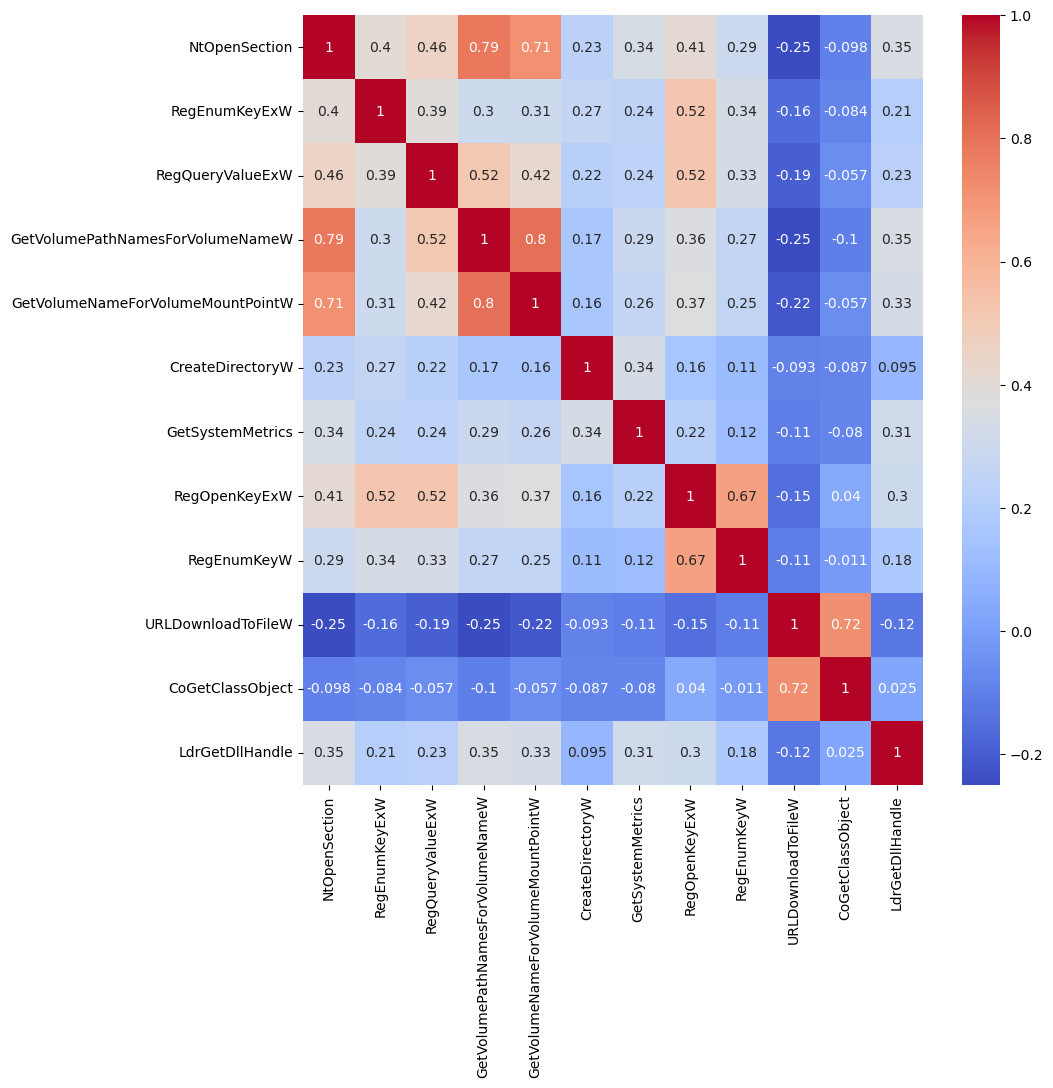

In [37]:
plt.figure(figsize=(10,10))

sns.heatmap(high_corrs.corr(), cmap='coolwarm', annot=True)
plt.show()

In [42]:
high_corrs.sample(10)

,NtOpenSection,RegEnumKeyExW,RegQueryValueExW,GetVolumePathNamesForVolumeNameW,GetVolumeNameForVolumeMountPointW,CreateDirectoryW,GetSystemMetrics,RegOpenKeyExW,RegEnumKeyW,URLDownloadToFileW,CoGetClassObject,LdrGetDllHandle,label
1894,0,0,0,0,0,0,0,0,0,0,0,0,1
1526,10,357,2401,8,4,136,1251,883,111,0,0,198,0
2298,0,0,0,0,0,0,0,0,0,4,10,0,1
2194,0,4,15,0,0,0,0,20,0,0,0,4,1
141,10,192,2343,8,4,230,9491,714,111,0,0,199,0
1396,10,357,2401,8,4,177,6839,883,111,0,0,198,0
1061,0,4,13,0,0,0,0,19,0,0,0,17,1
586,0,0,0,0,0,0,0,0,0,0,0,0,1
1569,0,0,0,0,0,0,0,0,0,0,0,51,1
2392,0,0,0,0,0,0,0,0,0,4,10,0,1


In [67]:
df.groupby('label')['FindFirstFileExW'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,570.0,63.612281,102.172305,0.0,39.25,50.5,74.0,1570.0
1,2513.0,314.842419,3463.766863,0.0,0.00,0.0,5.0,131643.0


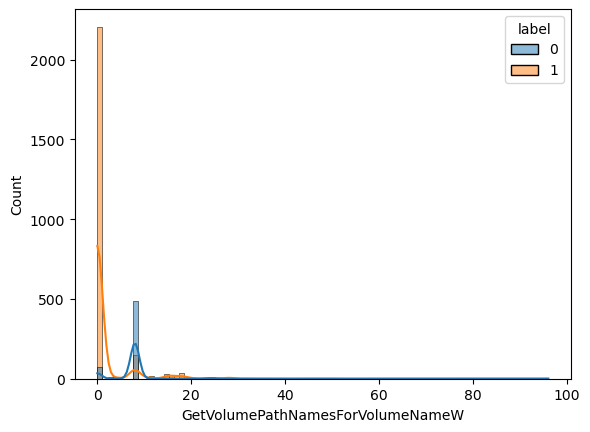

In [64]:
sns.histplot(data=df, x='GetVolumePathNamesForVolumeNameW', hue='label', kde=True)
plt.show()